# Basketball Simulation
An interactive simulation that allows you to showcase your physics and basketball skills!

## Input Diagram
To see what each of the sliders control, look here!

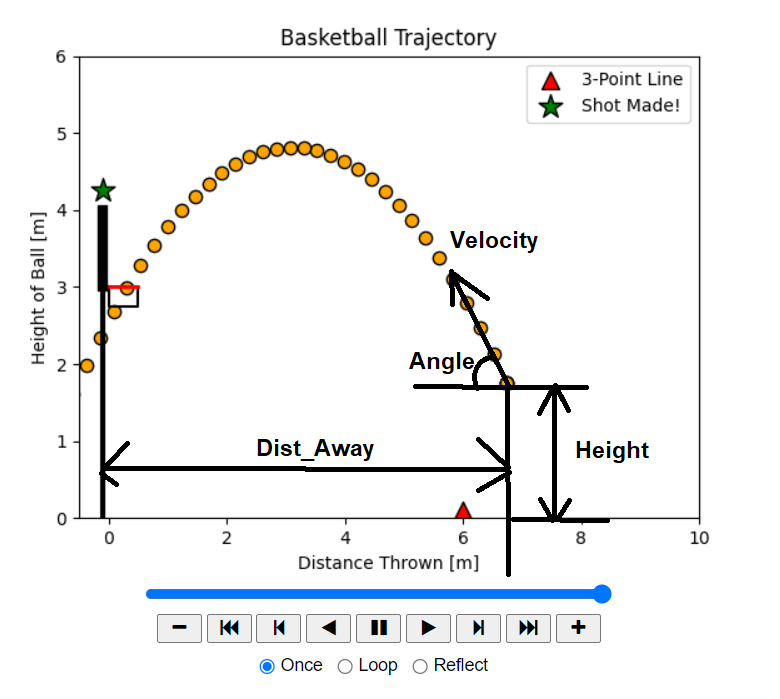

## Shoot Hoops!
Use the sliders to make shots from different spots on the court. When you understand how each of the variables impacts the flight of the ball, try to hit shots on the first attempt. By consistently hitting shots from different positions you prove your mastery of trajectory-based physics!

In [1]:
#Code For Animation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
Made = False;
Board = False;
@interact_manual(Drag_Force=['Off','On'],
                 Dist_Away=FloatSlider(min=1, max=10, step=.25),
                 Height=FloatSlider(min=0, max=2.5, step=.25),
                 Velocity=FloatSlider(min=4, max=12, step=.1),
                 Angle=FloatSlider(min=1, max=90, step=.5),layout=widgets.Layout(width='500px'))
def function(Drag_Force,Dist_Away,Height,Velocity,Angle):
    global Made, Board;
    Made = False;
    Board = False;
    M = 0.62          # Mass of projectile in kg
    g = 9.8           # Acceleration due to gravity (m/s^2)
    V = Velocity      # Initial velocity in m/s
    ang = Angle       # Angle of initial velocity in degrees
    if Drag_Force =='On':
        Cd = 0.53   # Drag coefficient
    if Drag_Force =='Off':
        Cd = 0;
    dt = 0.05         # time step in s
    print('Calculating...')
    t = [0]                         # list to keep track of time
    vx = [-V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
    vy = [V*np.sin(ang/180*np.pi)]
    x = [Dist_Away]                         # list for x and y position
    y = [Height]

    # Drag force
    drag=Cd*.01*V**2                      # drag force
    
    # Acceleration components
    ax = [(drag*np.cos(ang/180*np.pi))/M ]
    ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

    # Use Euler method to update variables
    counter = 0
    while (y[counter] >= 0):                   # Check that the last value of y is >= 0
        t.append(t[counter]+dt)                # increment by dt and add to the list of time

        # Update velocity
        vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
        vy.append(vy[counter]+dt*ay[counter])

        # Update position
        x.append(x[counter]+dt*vx[counter])
        y.append(y[counter]+dt*vy[counter])

        # With the new velocity calculate the drag force and update acceleration
        vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
        drag = Cd*.01*vel**2                                   # drag force
        ax.append((drag*np.cos(ang/180*np.pi))/M)
        ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))

        # Increment the counter by 1
        counter = counter +1
        
    # Let's plot the trajectory
    fig, ax = plt.subplots()
    plt.title('Basketball Trajectory')
    ax.set_xlabel('Distance Thrown [m]')
    ax.set_ylabel('Height of Ball [m]')
    ax.set_ylim(( 0, 6))
    ax.set_xlim((-.5,10))
    #Court Features
    rim_x = [0,0.5,0.5,0,0]
    rim_y = [3,3,2.75,2.75,3]
    Back_x = [-0.1,-0.1]
    Back_y = [3,4]
    pole_x = [-0.1,-0.1]
    pole_y = [3,0]
    ax.plot(rim_x,rim_y,c='black')
    ax.plot(rim_x[0:2],rim_y[0:2],c='red',linewidth = '2')
    ax.plot(Back_x,Back_y,c='black',linewidth = '6')
    ax.plot(pole_x,pole_y,c='black',linewidth = '3')
    Point_Line = ax.scatter(6,.1, marker="^", s=100, color='red',edgecolors='black',label='3-Point Line')
    ax.legend(handles=[Point_Line],loc='upper right')
    
    print('loading animation...')
    #animation function

    def animate(i):
        global Made,Board
        cur_time = t[i]
        xplot = x[i]
        yplot = y[i]
        scatter_plot = ax.scatter(xplot,yplot, marker="o", s=55,color='orange',edgecolors='black')
        
        if 0.01<x[i]<0.48 and 2.8<y[i]<3.25:
            S_Made = ax.scatter(-0.1,4.25,marker="*", s=200, color='green',edgecolors='black',label= 'Shot Made!')
            ax.legend(handles=[Point_Line,S_Made],loc='upper right')
            Made = True;
            return (scatter_plot,)
        
        elif -0.5<x[i]<0 and 3<y[i]<4 and Made == False:
            BBoard = ax.scatter(-0.1,4.25,marker="s", s=200, color='yellow',edgecolors='black',label='Hit Backboard!')
            ax.legend(handles=[Point_Line,BBoard],loc='upper right')
            Board = True;
            return (scatter_plot,)
        
        elif -0.5<x[i]<0 and (y[i]<3 or 4<y[i]) and Made == False and Board == False:
            S_Miss = ax.scatter(-0.1,4.25,marker="X", s=200, color='red',edgecolors='black',label='Shot Missed!')
            ax.legend(handles=[Point_Line,S_Miss],loc='upper right')
            return (scatter_plot,)
        else:
            return (scatter_plot,)
        
    anim = animation.FuncAnimation(fig, animate,frames=counter,interval=40, blit=True)
    plt.close()
    return HTML(anim.to_jshtml())    

interactive(children=(Dropdown(description='Drag_Force', options=('Off', 'On'), value='Off'), FloatSlider(valu…

# Basketball Simulation Creation Using Python

If you want to learn more about how the simulation was made and the physics supporting it, explore this section!

## Purpose of Demonstration
The fundemental purpose of the Basketball simulation is listed here.

In this exercise, we will use a simple script to plot the trajectory of a projectile with inclusion of air resistance. We will also calculate the range of the projectile.

The air resistance drag force $F_d$ in $N$ is approximated by the following relation.

  $$ F_d = C_d v^2 $$

Here, $v$ is the magnitude of velocity in $m/s$ and $C_d$ is the coefficient of drag.

## Simulation Creation Steps

If you want to learn more about how this simulation was made, explore this section!

### Define the parameters in the problem

First we import the modules we need: numpy to provide some mathematics functions, and matplotlib for plotting.

To start describing the problem, we need to define the parameters in the problem.

- the mass of the projectile
- acceleration due to gravity
- initial velocity (magnitude and direction)
- drag coefficient

We also set the time step to track the trajectory.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Set up the variables at time zero

Next, we generate velocity of the projectile as a function of time. To do that, we create the following lists.

- list to store the values of time $t$
- list to store x-component of velocity $v_x$
- list to store y-component of velocity $v_y$
- list to store x-component of acceleration $a_x$
- list to store y-component of acceleration $a_y$

We start by putting in the initial velocity components $v_x = V \cos\theta$ and $v_y = V \sin\theta$  at $t=0$.

To get the acceleration, we need to find the resultant force, which consists of the air drag $F_d$ and weight $W$.

$$ W = M g$$

and

$$ F_d = C_d v^2 $$

The x and y components of the resultant force are given by

$$ F_x = - F_d \cos\theta \qquad \text{and} \qquad F_y = -Mg - F_d \sin\theta $$

where $\theta$ is the angle that the velocity forms with the positive x-axis. The force components follow the convention that they are positive when pointing to the right and upwards.

By Newton's second law, the acceleration of the projectile is thus given by

$$ a_x = - (F_d \cos\theta)/M \qquad \text{and} \qquad a_y = -g - (F_d \sin\theta)/M $$

Let's implement these steps to get the velocity, drag force, and acceleration at $t=0$.

In [3]:
# Model parameters
M = 0.5          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 8           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

### Update the velocity for every time-step

To get the velocity at the next time step, we make use of the following approximation.

$$ a(t_{n}) = \frac{dv(t_{n})}{dt} \approx \frac{v(t_{n+1}) - v(t_n)}{\Delta t} $$

or

$$ v(t_{n+1}) \approx v(t_n) +  a(t_n) \Delta t $$

This is just a very primitive way of doing integration of acceleration to get velocity. In the literature, this is known as Euler's method.

Let us calculate 10 sets of velocities for 10 time-steps. We will use a while-loop and keep a counter to count to 10.

In [4]:
# Set up the lists to store variables
# Start by putting the initial velocities at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]

# Drag force
drag = Cd*V**2                      # drag force

# Create the lists for acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M]
ay = [-g-(drag*np.sin(ang/180*np.pi)/M)]

counter = 0
while (counter < 10):
    t.append(t[counter]+dt)                # increment by dt and add to the list of time
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # With the new velocity calculate the drag force
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))

    # Increment the counter by 1
    counter = counter +1

### Update the positions

After we have obtained the velocities, we can get the $x$ and $y$ positions of the projectile using a similar concept.

$$ v_x(t_{n}) = \frac{dx(t_{n})}{dt} \approx \frac{x(t_{n+1}) - x(t_n)}{\Delta t}
   \qquad \text{and} \qquad
   v_y(t_{n}) = \frac{dy(t_{n})}{dt} \approx \frac{y(t_{n+1}) - y(t_n)}{\Delta t}
$$

or

$$ x(t_{n+1}) \approx x(t_n) +  v_x(t_n) \Delta t
   \qquad \text{and} \qquad
   y(t_{n+1}) \approx y(t_n) +  v_y(t_n) \Delta t
$$

Starting with $x=0$ and $y=0$ at $t=0$, we can use Euler's method to get the positions for the 10 time-steps using the velocities found previously.

In [5]:
# Initialise the lists for x and y
x = [0]
y = [0]

# Use Euler method to update variables
counter = 0
while (counter < 10):
    # Update the positions x and y
    x.append(x[counter]+dt*vx[counter])
    y.append(y[counter]+dt*vy[counter])
    # Increment the counter by 1
    counter = counter +1

### Let's put everything together

How about calculating the velocity and position all together in the same while-loop?

Also, let's stop the while-loop after the projectile drops back to the ground again. One simple way to detect this is to check whether the value of $y$ position falls below zero. So, we keep running the while-loop while $y \ge 0$.